Flight Price Prediction

Performing some basic EDA and Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Flight_price_cleaned_dataset.csv')
df.head(2)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [3]:
##Finding information regardting datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


We can see most features are of object datatype

In [4]:
df.columns

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0',axis =1 , inplace = True)

In [6]:
df.head(2)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953


In [8]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print(f"There are {len(num_features)} numerical features : {num_features}")
print(f"There are {len(cat_features)} categorical features : {cat_features}")

There are 3 numerical features : ['duration', 'days_left', 'price']
There are 8 categorical features : ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


In [ ]:
##Finding out statistical information
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [12]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

There are no Nan values

In [ ]:
##Finding duplicate values
df.duplicated()                ##No duplicate values as well

0         False
1         False
2         False
3         False
4         False
          ...  
300148    False
300149    False
300150    False
300151    False
300152    False
Length: 300153, dtype: bool

In [16]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [20]:
print(df['airline'].unique())
print(df['flight'].unique())
print(df['source_city'].unique())
print(df['departure_time'].unique())
print(df['stops'].unique())
print(df['arrival_time'].unique())
print(df['destination_city'].unique())
print(df['class'].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


In [23]:
print(f"Number of unique values in flight : {df['flight'].nunique()}")   

Number of unique values in flight : 1561


So we cannot use OneHotEncoding for 'flights' as there are a lot of unique values

Performaing Data Visualisation

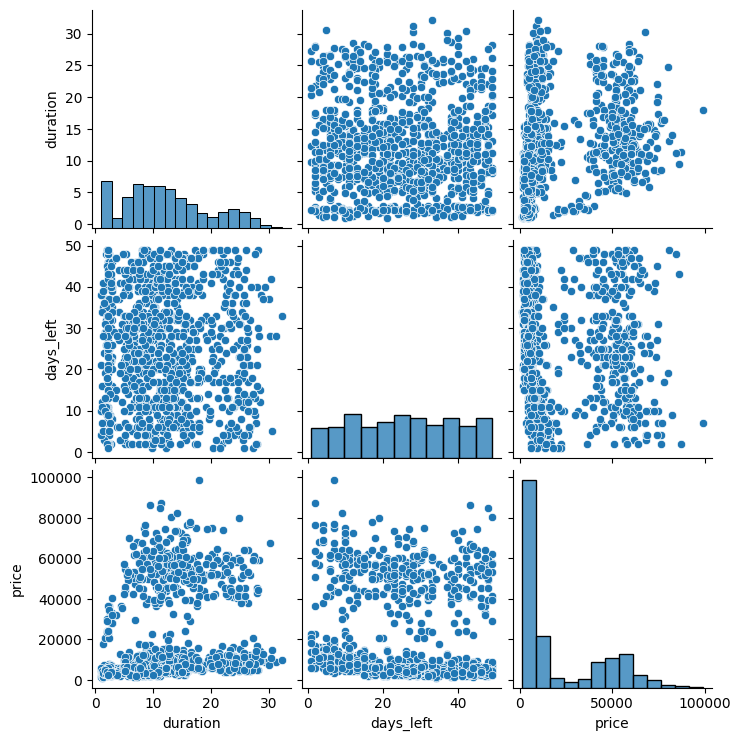

In [15]:
sns.pairplot(df.sample(1000))

Finding distribution of 'airline'

<Axes: ylabel='count'>

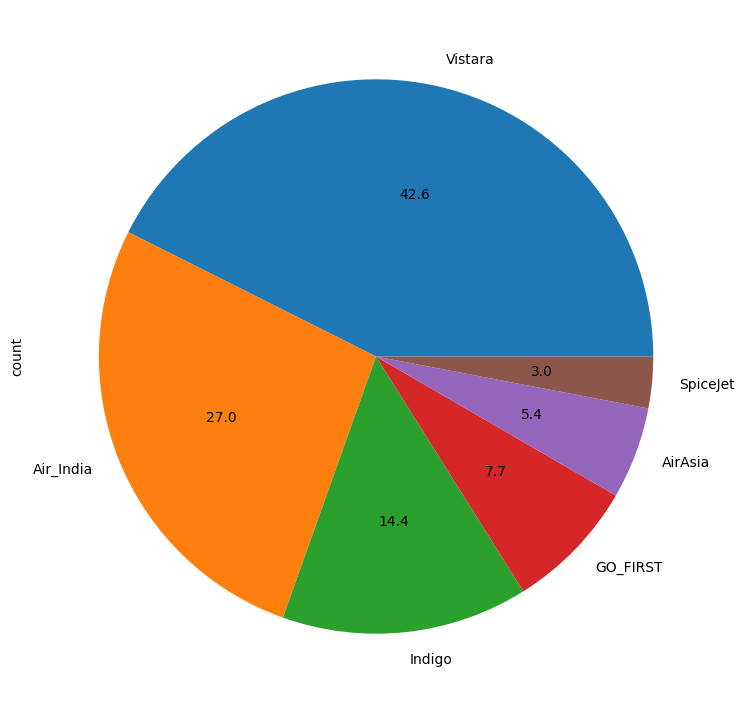

In [25]:
df['airline'].value_counts().plot.pie(y = df['airline'] ,figsize = (10,9) , autopct = '%1.1f')

'Vistara' airlines is mostly preferred ,
follwed by 'Air India' then 'Indigo'

<Axes: ylabel='count'>

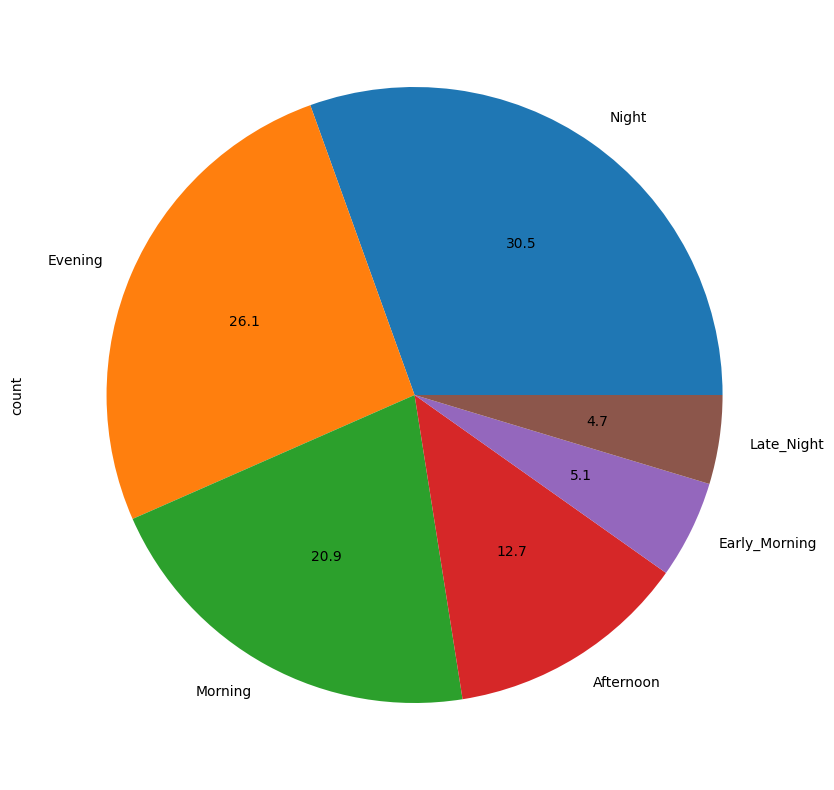

In [31]:
df['arrival_time'].value_counts().plot.pie(y = df['arrival_time'] ,figsize = (10,10) , autopct = "%1.1f")

<Axes: ylabel='count'>

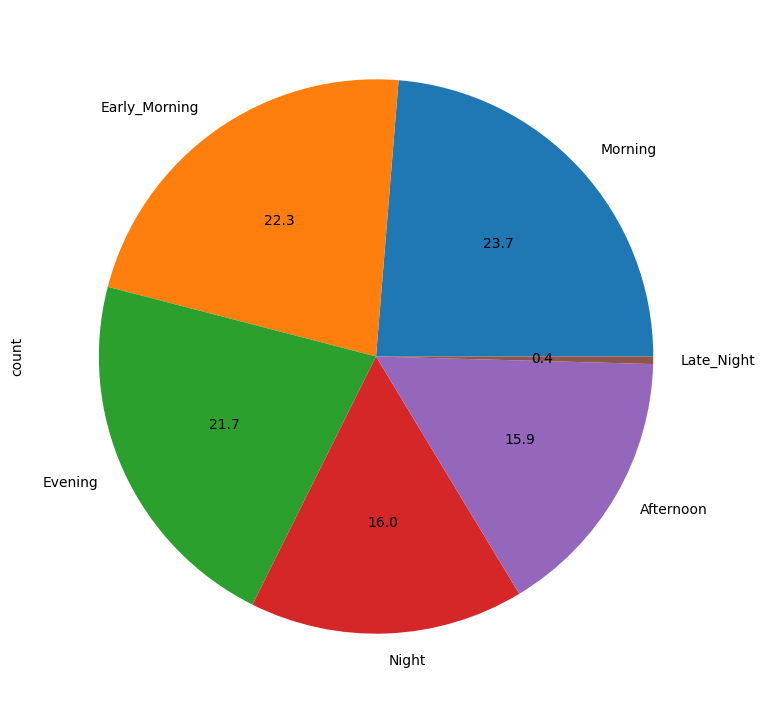

In [30]:
df['departure_time'].value_counts().plot.pie(y = df['departure_time'] ,figsize = (10,9) , autopct = '%1.1f')

Maximum fights arrive at night and get departed at morning

<Axes: xlabel='airline', ylabel='price'>

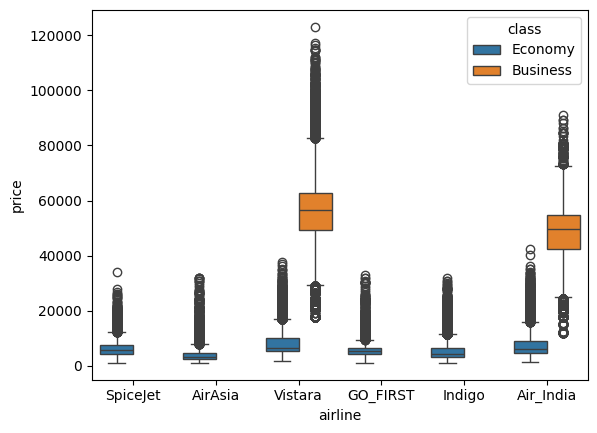

In [32]:
sns.boxplot(data=df, x='airline', y='price', hue='class')


In [ ]:
##Displaying average price per airline
pivot = df.pivot_table(index='airline', values='price', aggfunc='mean')
print(pivot)

                  price
airline                
AirAsia     4091.072742
Air_India  23507.019112
GO_FIRST    5652.007595
Indigo      5324.216303
SpiceJet    6179.278881
Vistara    30396.536302


In [ ]:
##Average price per class 
pivot = df.pivot_table(index = 'class' , values = 'price' , aggfunc = 'mean')   
print(pivot)

                 price
class                 
Business  52540.081124
Economy    6572.342383
